# Adi Gohain 
# Programming Assignment 2 
# MSDS Financial Engineering:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# Since I am looking at major Agricultural heavy equipment manufacturers my portfolio is considering 
# Deere & Co (DE), Caterpillar (CAT), AGCO Corp (AGCO), Case (CNH)

tickers = ["DE", "CAT", "AGCO", "CNH"]

# I am pulling my data from Yahoo finance API and downloading all the data at once
data = yf.download(tickers, 
                   start="2000-01-01", 
                   end="2025-01-01", 
                   group_by='ticker', 
                   auto_adjust=False)

# I am settting an helper function for extracting adjusted close / close price
adj_close_dict = {}
for ticker in tickers:
    df = data[ticker]
    # Trying to use 'adj close'; if it is missing.. then using 'close' instead
    if 'Adj Close' in df.columns:
        adj_close_dict[ticker] = df['Adj Close']
    elif 'Close' in df.columns:
        adj_close_dict[ticker] = df['Close']
    else:
        print(f"Issue: {ticker} does not have price data available.")

# Combining the output into a single df
adj_close = pd.concat(adj_close_dict, axis=1)

# Validating the process 
print("Adjusted Close data successfully extracted!")
print(adj_close.tail(10))

[*********************100%***********************]  4 of 4 completed

Adjusted Close data successfully extracted!
                    DE         CAT       AGCO        CNH
Date                                                    
2024-12-17  437.441803  371.273041  96.043465  11.386922
2024-12-18  420.095612  359.506561  93.336479  10.837208
2024-12-19  420.716858  356.028931  89.786667  10.797943
2024-12-20  426.495667  361.630676  92.711792  10.935371
2024-12-23  426.387177  360.988495  92.701874  10.994268
2024-12-24  426.840790  363.142212  93.227402  10.984452
2024-12-26  427.826965  362.697632  92.840691  11.062984
2024-12-27  424.099304  360.464844  92.414322  11.082616
2024-12-30  418.754486  358.637146  92.315163  11.004086
2024-12-31  419.427643  358.390198  92.691963  11.121881


In [3]:
returns_df = adj_close.pct_change().dropna()

# annualized average returns
target_mean = returns_df.mean().values * 252

# annualized std deviations / volitalities
target_sd = returns_df.std() * np.sqrt(252)

# Correlation Matrix
target_cor = returns_df.corr()

# annualized covariance
target_cov = returns_df.cov().values * 252

# Printing outputs
print("Expected Returns:\n", target_mean.T)
print("\nVolatilities:\n", target_sd.T)
print("\nCorrelation Matrix:\n", target_cor.T)
print("\nCovariance Matrix:\n", target_cov.T)


# Checking that df has the expected tickers as columns
print("Columns:", returns_df.columns)
print(returns_df.head())

Expected Returns:
 [0.20577701 0.19907321 0.11267175 0.08444244]

Volatilities:
 DE      0.282435
CAT     0.287866
AGCO    0.327162
CNH     0.351836
dtype: float64

Correlation Matrix:
             DE       CAT      AGCO       CNH
DE    1.000000  0.680886  0.755706  0.633669
CAT   0.680886  1.000000  0.622298  0.617889
AGCO  0.755706  0.622298  1.000000  0.646099
CNH   0.633669  0.617889  0.646099  1.000000

Covariance Matrix:
 [[0.07976928 0.05535838 0.06982872 0.06296798]
 [0.05535838 0.08286712 0.05860745 0.06258084]
 [0.06982872 0.05860745 0.10703513 0.0743707 ]
 [0.06296798 0.06258084 0.0743707  0.12378822]]
Columns: Index(['DE', 'CAT', 'AGCO', 'CNH'], dtype='object')
                  DE       CAT      AGCO       CNH
Date                                              
2013-10-01  0.010198  0.004317  0.005627  0.033600
2013-10-02  0.000973  0.003701  0.006419 -0.001548
2013-10-03 -0.002552 -0.001189  0.004742 -0.022481
2013-10-04  0.005604  0.002739  0.009278  0.002379
2013-10-07 -

In [4]:
# For reproducibility, I am defining a repeatable seed
np.random.seed(1111)

In [5]:
# Simulating 700 portfolios
sample_size = 700

In [6]:
# Displaying summary results
print("Summary statistics for generated returns:")
print(returns_df.describe())

print("\nTarget Correlation Matrix:\n", target_cor)
print("\nActual Correlation Matrix:\n", returns_df.corr())

print("\nTarget Covariance Matrix:\n", target_cov)
print("\nActual Covariance Matrix:\n", returns_df.cov())

Summary statistics for generated returns:
                DE          CAT         AGCO          CNH
count  2832.000000  2832.000000  2832.000000  2832.000000
mean      0.000817     0.000790     0.000447     0.000335
std       0.017792     0.018134     0.020609     0.022164
min      -0.140722    -0.142822    -0.187829    -0.149533
25%      -0.007588    -0.008165    -0.009765    -0.011325
50%       0.000658     0.000682     0.000952     0.000000
75%       0.009318     0.010104     0.010890     0.012202
max       0.134910     0.103320     0.200162     0.172684

Target Correlation Matrix:
             DE       CAT      AGCO       CNH
DE    1.000000  0.680886  0.755706  0.633669
CAT   0.680886  1.000000  0.622298  0.617889
AGCO  0.755706  0.622298  1.000000  0.646099
CNH   0.633669  0.617889  0.646099  1.000000

Actual Correlation Matrix:
             DE       CAT      AGCO       CNH
DE    1.000000  0.680886  0.755706  0.633669
CAT   0.680886  1.000000  0.622298  0.617889
AGCO  0.755706  0.

In [7]:
data_cov = returns_df.cov().values

In [8]:
# Function for generating random weights
def make_weights(shorts_ok=True):
    if shorts_ok:
        w = np.random.uniform(-1, 1, 3)
        w4 = 1 - np.sum(w)
        return np.append(w, w4)
    else:
        w = np.random.uniform(0, 1, 4)
        return w / np.sum(w)

In [9]:
# Generating portfolios with short positions allowed and setting repeatable seed
np.random.seed(9999)
weights_matrix = np.array([make_weights(shorts_ok=True) for _ in range(sample_size)])

In [10]:
results_short = []
for w in weights_matrix:
    positions = 2 if np.all(w > 0) else 1
    portfolio_return = np.dot(w, returns_df.T)
    return_mean = np.mean(portfolio_return)
    return_sd = np.sqrt(w.T @ data_cov @ w)
    results_short.append([*w, positions, return_mean, return_sd])

In [11]:
shortsOK_df = pd.DataFrame(results_short, columns = ['w1','w2','w3','w4','Positions','returnMean','returnSD'])
shortsOK_df["ShortsOK"] = "Shorts OK"
shortsOK_df["Positions"] = shortsOK_df["Positions"].map({1: "Has Short(s)", 2: "No Shorts"})

In [12]:
print("\nSummary of portfolio results with short positions allowed:")
print(shortsOK_df.describe())


Summary of portfolio results with short positions allowed:
               w1          w2          w3          w4  returnMean    returnSD
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000
mean    -0.014713   -0.007042    0.029627    0.992128    0.000328    0.027067
std      0.557582    0.573073    0.569792    0.989690    0.000379    0.008229
min     -0.994831   -0.991634   -0.999805   -1.753869   -0.000573    0.016640
25%     -0.502010   -0.498816   -0.432321    0.322851    0.000042    0.020532
50%      0.007990   -0.007067    0.022068    0.999672    0.000326    0.024912
75%      0.421484    0.482402    0.534044    1.711077    0.000604    0.032276
max      0.997148    0.998624    0.999038    3.490209    0.001301    0.055960


In [13]:
# Generating portfolios with no shorts allowed and setting repeatable seed
np.random.seed(9999)
weights_matrix = np.array([make_weights(shorts_ok = False) for _ in range(sample_size)])

In [14]:
results_long = []
for w in weights_matrix:
    positions = 2 if np.all(w > 0) else 1
    portfolio_return = np.dot(w, returns_df.T)
    return_mean = np.mean(portfolio_return)
    return_sd = np.sqrt(w.T @ data_cov @ w)
    results_long.append([*w, positions, return_mean, return_sd])

In [15]:
noShorts_df = pd.DataFrame(results_long, columns=['w1','w2','w3','w4','Positions','returnMean','returnSD'])
noShorts_df["ShortsOK"] = "Long Positions Only"
noShorts_df["Positions"] = noShorts_df["Positions"].map({1: "Has Short(s)", 2: "No Shorts"})

print("\nSummary of portfolio results with long positions only:")
print(noShorts_df.describe())


Summary of portfolio results with long positions only:
               w1          w2          w3          w4  returnMean    returnSD
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000
mean     0.240186    0.260686    0.252060    0.247068    0.000598    0.017254
std      0.134779    0.141794    0.138128    0.136837    0.000067    0.000554
min      0.000397    0.000777    0.000346    0.000074    0.000412    0.016395
25%      0.136629    0.157982    0.141819    0.138799    0.000553    0.016868
50%      0.235841    0.262977    0.256370    0.248044    0.000600    0.017132
75%      0.326402    0.354180    0.342980    0.337451    0.000641    0.017543
max      0.825732    0.854155    0.769339    0.767189    0.000779    0.019995


In [16]:
# Combining both the results 
plot_df = pd.concat([shortsOK_df, noShorts_df], ignore_index=True)

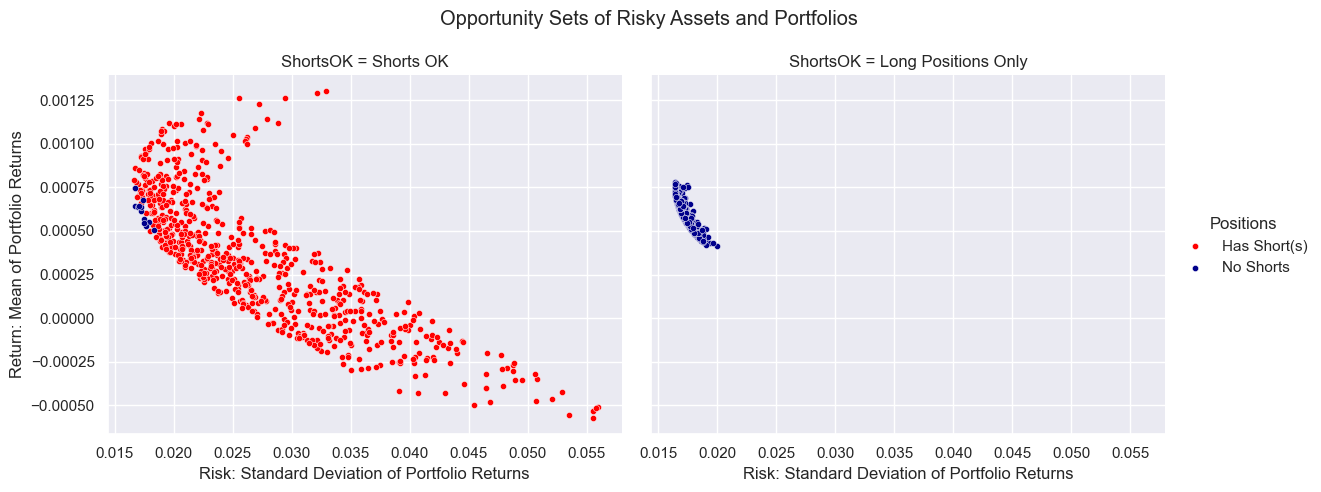

In [17]:
# Creating a Plot using Seaborn

sns.set(style = "darkgrid")
g = sns.FacetGrid(plot_df, 
                  col = "ShortsOK", 
                  hue = "Positions", 
                  palette = {"Has Short(s)":"red", "No Shorts":"darkblue"}, 
                  height = 5, 
                  aspect = 1.2)
g.map_dataframe(sns.scatterplot, x = "returnSD", y = "returnMean", s=20)
g.add_legend()
g.set_axis_labels("Risk: Standard Deviation of Portfolio Returns", "Return: Mean of Portfolio Returns")
plt.subplots_adjust(top = 0.85)
g.fig.suptitle("Opportunity Sets of Risky Assets and Portfolios")

plt.show()

In [18]:
# Save plot to PDF
g.savefig("451-portfolio-optimization-monte-carlo-figure.pdf", bbox_inches="tight")

print("\nRun Complete")


Run Complete
